In [1]:
!pip install tensorflow matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data for CNN (for RNN, the reshape will be different)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


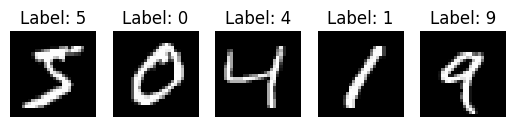

In [4]:
# Display first 5 images
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


## Building the Model (CNN Architecture)

In [5]:
# Build CNN model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the model
history_cnn = model_cnn.fit(X_train,
                            y_train,
                            epochs=10,
                            validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8961 - loss: 0.3333 - val_accuracy: 0.9846 - val_loss: 0.0458
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9845 - loss: 0.0480 - val_accuracy: 0.9879 - val_loss: 0.0372
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9909 - loss: 0.0299 - val_accuracy: 0.9879 - val_loss: 0.0371
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9922 - loss: 0.0252 - val_accuracy: 0.9908 - val_loss: 0.0280
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9946 - loss: 0.0181 - val_accuracy: 0.9900 - val_loss: 0.0334
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9919 - val_loss: 0.0295
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9958 - loss: 0.0119 - val_accuracy: 0.9910 - val_loss: 0.0298
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9965 -

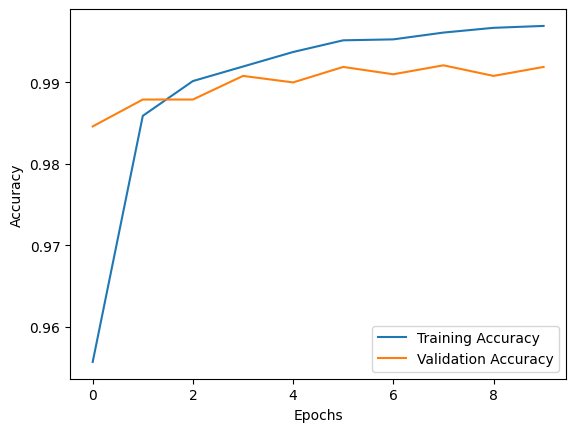

In [7]:
# Plot training and validation accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
# Evaluate the CNN model
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {test_accuracy:.3f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9895 - loss: 0.0474
CNN Test Accuracy: 0.992


## RNN Model (Using LSTM)

In [9]:
# Reshape data for RNN (LSTM expects 3D input: samples, timesteps, features)
X_train_rnn = X_train.reshape(-1, 28, 28)  # 28x28 is the timestep and feature size
X_test_rnn = X_test.reshape(-1, 28, 28)


In [10]:
# Build RNN model using LSTM
model_rnn = models.Sequential([
    layers.LSTM(128, input_shape=(28, 28), activation='relu', return_sequences=True),
    layers.LSTM(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_rnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Train the model
history_rnn = model_rnn.fit(X_train_rnn,
                            y_train,
                            epochs=10,
                            validation_data=(X_test_rnn, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 106s 55ms/step - accuracy: 0.7011 - loss: 0.8828 - val_accuracy: 0.9538 - val_loss: 0.1413
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 53ms/step - accuracy: 0.9616 - loss: 0.1223 - val_accuracy: 0.9783 - val_loss: 0.0712
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.9761 - loss: 0.0819 - val_accuracy: 0.9831 - val_loss: 0.0509
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.9812 - loss: 0.0614 - val_accuracy: 0.9847 - val_loss: 0.0502
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.9857 - loss: 0.0490 - val_accuracy: 0.9844 - val_loss: 0.0478
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.9884 - loss: 0.0395 - val_accuracy: 0.9848 - val_loss: 0.0475
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 51ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9849 - val_loss: 0.0478
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 52ms/step - accuracy: 0

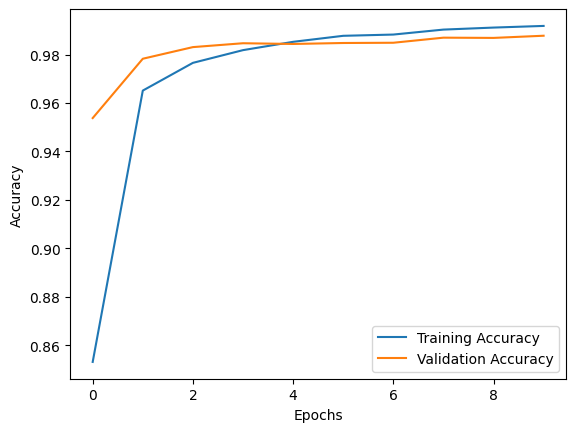

In [12]:
# Plot training and validation accuracy
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Evaluate the RNN model
test_loss_rnn, test_accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test)
print(f"RNN Test Accuracy: {test_accuracy_rnn:.3f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9842 - loss: 0.0503
RNN Test Accuracy: 0.988


**Dropout Analysis Summary:**

**No Overfitting**: Training and validation metrics are well-aligned, with stable validation loss and high accuracy.

**High Generalization**: The model performs consistently well without signs of instability or performance degradation.

**Conclusion**: Dropout is unnecessary for this setup, as it may lower training accuracy and slow convergence without improving validation performance.

## Experiment with Different Optimizers (SGD and RMSprop)

In [16]:
# SGD optimizer
from tensorflow.keras.optimizers import SGD

# Compile the model with SGD optimizer
model_cnn.compile(optimizer=SGD(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train and evaluate the model
history_sgd = model_cnn.fit(X_train,
                            y_train,
                            epochs=10,
                            validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9927 - val_loss: 0.0313
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9930 - val_loss: 0.0307
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9935 - val_loss: 0.0306
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9998 - loss: 9.0419e-04 - val_accuracy: 0.9931 - val_loss: 0.0307
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9999 - loss: 7.8658e-04 - val_accuracy: 0.9936 - val_loss: 0.0306
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9999 - loss: 9.4132e-04 - val_accuracy: 0.9930 - val_loss: 0.0308
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9999 - loss: 8.3271e-04 - val_accuracy: 0.9932 - val_loss: 0.0310
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - ac

In [17]:
# Evaluate the model with SGD optimizer
test_loss_sgd, test_accuracy_sgd = model_cnn.evaluate(X_test, y_test)
print(f"CNN Test Accuracy with SGD: {test_accuracy_sgd:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9903 - loss: 0.0425
CNN Test Accuracy with SGD: 0.993


In [18]:
# RMSprop optimizer

from tensorflow.keras.optimizers import RMSprop

# Compile the model with RMSprop optimizer
model_cnn.compile(optimizer=RMSprop(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train and evaluate the model
history_rmsprop = model_cnn.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test))




Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9921 - val_loss: 0.0530
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 0.9925 - val_loss: 0.0535
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9999 - loss: 2.8443e-04 - val_accuracy: 0.9925 - val_loss: 0.0567
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9998 - loss: 3.5380e-04 - val_accuracy: 0.9930 - val_loss: 0.0517
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 1.0000 - loss: 5.4778e-05 - val_accuracy: 0.9933 - val_loss: 0.0511
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 1.0000 - loss: 7.4795e-06 - val_accuracy: 0.9930 - val_loss: 0.0559
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 1.0000 - loss: 2.7172e-06 - val_accuracy: 0.9930 - val_loss: 0.0556
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step 

In [19]:
# Evaluate the model with RMSprop optimizer
test_loss_rmsprop, test_accuracy_rmsprop = model_cnn.evaluate(X_test, y_test)
print(f"CNN Test Accuracy with RMSprop: {test_accuracy_rmsprop:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9898 - loss: 0.0787
CNN Test Accuracy with RMSprop: 0.993


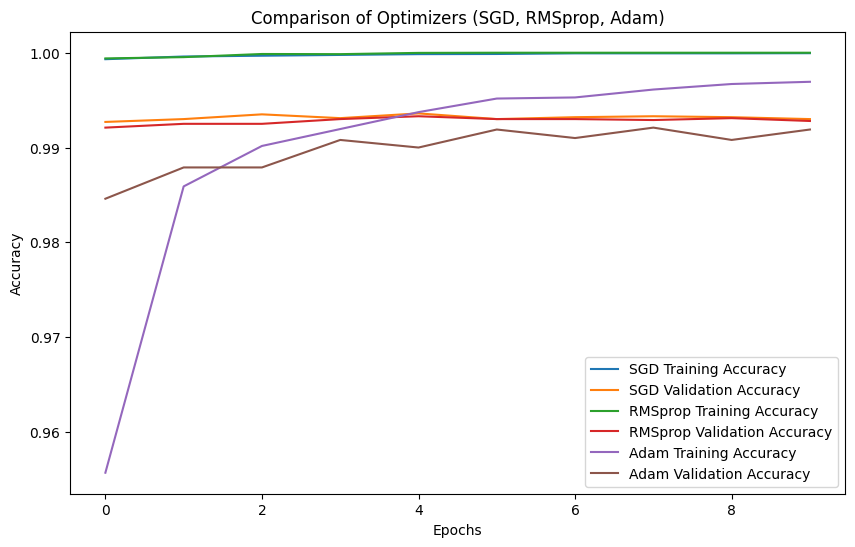

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy for each optimizer
plt.figure(figsize=(10, 6))

# SGD accuracy
plt.plot(history_sgd.history['accuracy'], label='SGD Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy')

# RMSprop accuracy
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop Training Accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop Validation Accuracy')

# Adam accuracy
plt.plot(history_cnn.history['accuracy'], label='Adam Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Adam Validation Accuracy')

# Labels and title
plt.title('Comparison of Optimizers (SGD, RMSprop, Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


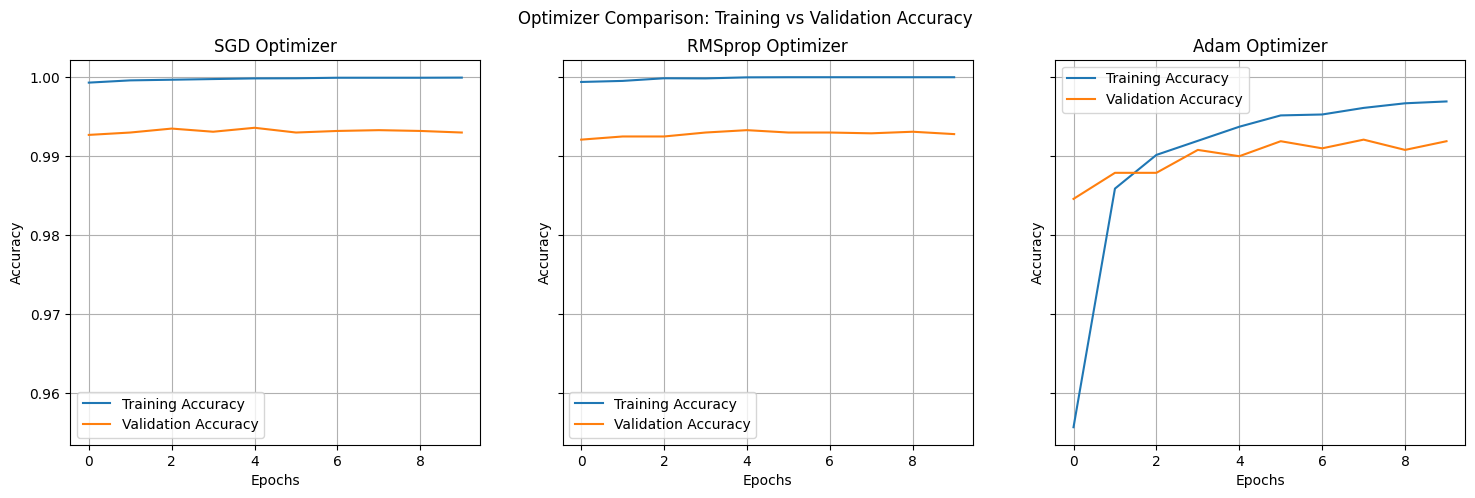

In [21]:
# Subplot visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

optimizers = ['SGD', 'RMSprop', 'Adam']
histories = [history_sgd, history_rmsprop, history_cnn]

for i, history in enumerate(histories):
    axes[i].plot(history.history['accuracy'], label='Training Accuracy')
    axes[i].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[i].set_title(f'{optimizers[i]} Optimizer')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()
    axes[i].grid(True)

plt.suptitle('Optimizer Comparison: Training vs Validation Accuracy')
plt.show()


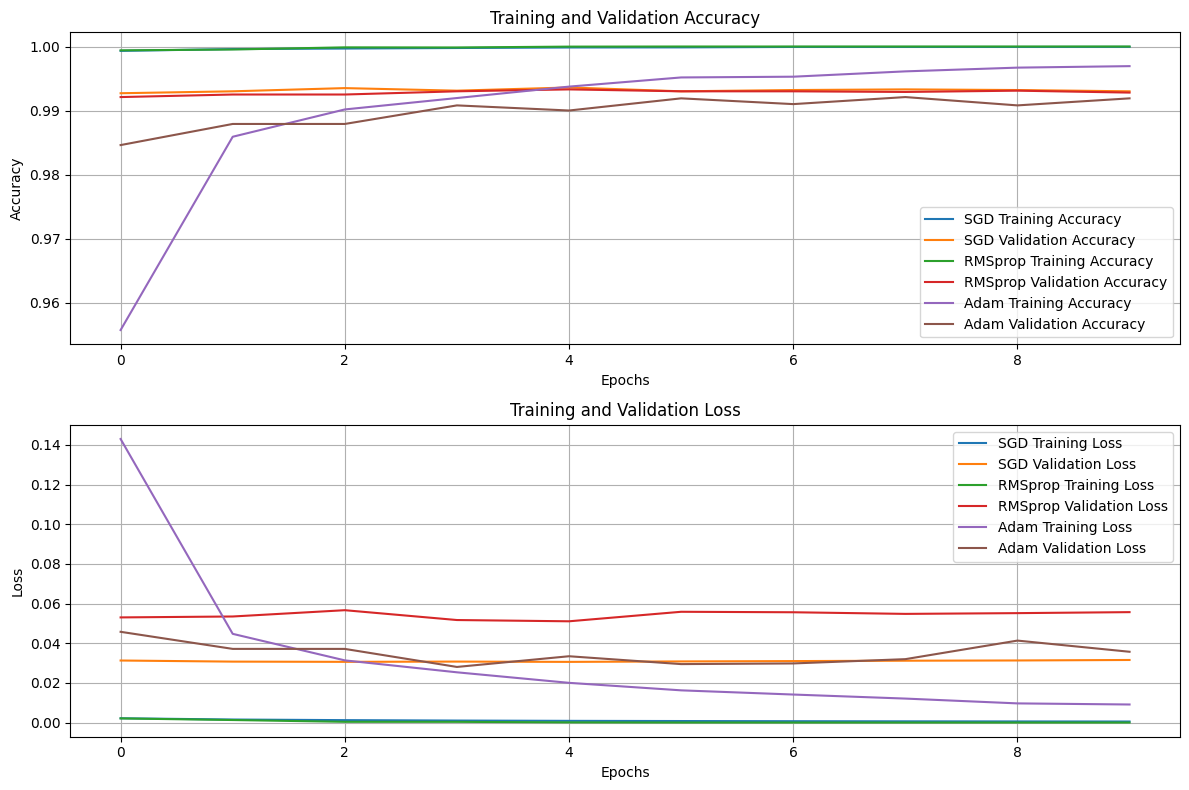

In [22]:
# Plot accuracy and loss together for all optimizers
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 1, 1)
plt.plot(history_sgd.history['accuracy'], label='SGD Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop Training Accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop Validation Accuracy')
plt.plot(history_cnn.history['accuracy'], label='Adam Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Adam Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(2, 1, 2)
plt.plot(history_sgd.history['loss'], label='SGD Training Loss')
plt.plot(history_sgd.history['val_loss'], label='SGD Validation Loss')
plt.plot(history_rmsprop.history['loss'], label='RMSprop Training Loss')
plt.plot(history_rmsprop.history['val_loss'], label='RMSprop Validation Loss')
plt.plot(history_cnn.history['loss'], label='Adam Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Adam Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [23]:
import plotly.graph_objects as go

# Create traces for accuracy
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=history_sgd.history['accuracy'],
    x=list(range(1, len(history_sgd.history['accuracy']) + 1)),
    mode='lines',
    name='SGD Training Accuracy'
))
fig.add_trace(go.Scatter(
    y=history_sgd.history['val_accuracy'],
    x=list(range(1, len(history_sgd.history['val_accuracy']) + 1)),
    mode='lines',
    name='SGD Validation Accuracy'
))
fig.add_trace(go.Scatter(
    y=history_rmsprop.history['accuracy'],
    x=list(range(1, len(history_rmsprop.history['accuracy']) + 1)),
    mode='lines',
    name='RMSprop Training Accuracy'
))
fig.add_trace(go.Scatter(
    y=history_rmsprop.history['val_accuracy'],
    x=list(range(1, len(history_rmsprop.history['val_accuracy']) + 1)),
    mode='lines',
    name='RMSprop Validation Accuracy'
))
fig.add_trace(go.Scatter(
    y=history_cnn.history['accuracy'],
    x=list(range(1, len(history_cnn.history['accuracy']) + 1)),
    mode='lines',
    name='Adam Training Accuracy'
))
fig.add_trace(go.Scatter(
    y=history_cnn.history['val_accuracy'],
    x=list(range(1, len(history_cnn.history['val_accuracy']) + 1)),
    mode='lines',
    name='Adam Validation Accuracy'
))

# Customize layout
fig.update_layout(
    title="Optimizer Comparison: Training vs Validation Accuracy",
    xaxis_title="Epochs",
    yaxis_title="Accuracy",
    legend_title="Legend",
    template="plotly_dark"
)

fig.show()
